In [31]:
import pandas as pd
df_train = pd.read_csv("audit_data/audit_risk.csv")

In [32]:
df_train.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


# Check it's classification or regression problem

In [33]:
df_train['Risk'].value_counts()
# it's binary classification problem

0    471
1    305
Name: Risk, dtype: int64

#  check any missing value

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

# Pre-processing the Dataset

In [35]:
df_train.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [36]:
# one value is missing in the money_value fill it by using mean function
df_train['Money_Value'] = df_train['Money_Value'].fillna(df_train['Money_Value'].mean())

In [37]:
df_train['Money_Value'].isnull().sum()

0

### Data Visualization

In [38]:
# select target coloumn
y_train = df_train['Risk']

In [39]:
# drop those features which have no more important for the risk analysis
cols= ['Sector_score','LOCATION_ID', 'Score_A', 'Risk_A','Score_B', 'Risk_B','Risk_C','Score_MV','Risk_D','PROB'
      ,'RiSk_E','Prob','Risk_F', 'Risk']

x_train = df_train.drop(cols, axis=1)

In [40]:
x_train.head()

,PARA_A,PARA_B,TOTAL,numbers,Score_B.1,Money_Value,District_Loss,History,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,4.18,2.50,6.68,5.0,0.2,3.38,2,0,2.4,8.574,0.4,0.5,1.7148
1,0.00,4.83,4.83,5.0,0.2,0.94,2,0,2.0,2.554,0.4,0.5,0.5108
2,0.51,0.23,0.74,5.0,0.2,0.00,2,0,2.0,1.548,0.4,0.5,0.3096
3,0.00,10.80,10.80,6.0,0.6,11.75,2,0,4.4,17.530,0.4,0.5,3.5060
4,0.00,0.08,0.08,5.0,0.2,0.00,2,0,2.0,1.416,0.4,0.5,0.2832


In [41]:
y_train.head()

0    1
1    0
2    0
3    1
4    0
Name: Risk, dtype: int64

In [42]:
num_col = x_train.columns.tolist()
print(num_col)

['PARA_A', 'PARA_B', 'TOTAL', 'numbers', 'Score_B.1', 'Money_Value', 'District_Loss', 'History', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk', 'Audit_Risk']


## Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
x_train[num_col] = Scaler.fit_transform(x_train[num_col])
print(x_train[num_col])

       PARA_A        PARA_B     TOTAL   numbers  Score_B.1  Money_Value  \
0    0.304800 -1.658295e-01 -0.127506 -0.255998  -0.295285    -0.161719   
1   -0.431736 -1.192773e-01 -0.163583 -0.255998  -0.295285    -0.198399   
2   -0.341872 -2.111829e-01 -0.243341 -0.255998  -0.295285    -0.212530   
3   -0.431736  2.317208e-07 -0.047162  3.527894   4.686039    -0.035893   
4   -0.431736 -2.141798e-01 -0.256212 -0.255998  -0.295285    -0.212530   
..        ...           ...       ...       ...        ...          ...   
771 -0.345396 -2.077864e-01 -0.240416 -0.255998  -0.295285    -0.212530   
772 -0.348920 -2.083858e-01 -0.241391 -0.255998  -0.295285    -0.212530   
773 -0.389447 -2.149790e-01 -0.252312 -0.255998  -0.295285    -0.212530   
774 -0.396495 -2.157782e-01 -0.253872 -0.255998  -0.295285    -0.212530   
775 -0.431736 -2.157782e-01 -0.257772 -0.255998  -0.295285    -0.207719   

     District_Loss   History     Score  Inherent_Risk  CONTROL_RISK  \
0        -0.411402 -0.196691

## For handling unbalance Dataset using SMOTE

In [44]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
xbln_train, ybln_train = oversample.fit_resample(x_train,y_train)
# print(ybln_train)

## Splitting the Dataset

In [45]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(xbln_train, ybln_train, test_size=0.3, random_state=150)

## Model Training

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(X_tr, y_tr)

RandomForestClassifier()

### Cross validation

In [47]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_RF = cross_val_score(estimator = model_RF, X = X_tr, y = y_tr, cv = kfold,scoring=scoring)
acc_RF.mean()

0.9984848484848484

### Model Evaluation

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import  f1_score, precision_score,recall_score, roc_auc_score

y_predict_rf = model_RF.predict(X_val)
acc= accuracy_score(y_val, y_predict_rf)
roc=roc_auc_score(y_val, y_predict_rf)
prec = precision_score(y_val, y_predict_rf)
rec = recall_score(y_val, y_predict_rf)
f1 = f1_score(y_val, y_predict_rf)

results = pd.DataFrame([['Random Forest',acc, acc_RF.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,1.0,0.998485,1.0,1.0,1.0,1.0


### Confusion Matrix

In [49]:
print(confusion_matrix(y_val, y_predict_rf))
print(classification_report(y_val, y_predict_rf))

[[153   0]
 [  0 130]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       130

    accuracy                           1.00       283
   macro avg       1.00      1.00      1.00       283
weighted avg       1.00      1.00      1.00       283



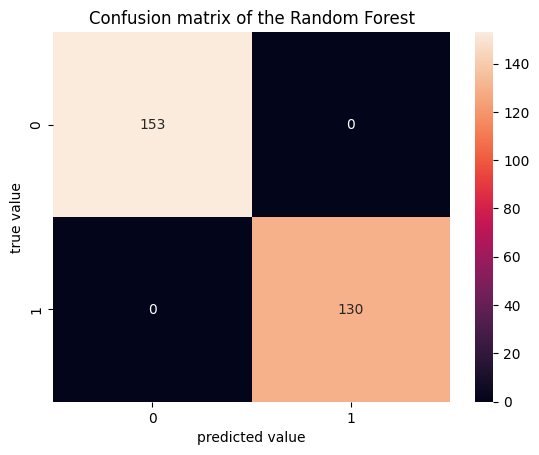

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

cm_logi = confusion_matrix(y_val, y_predict_rf)
plt.title('Confusion matrix of the Random Forest')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

## Support Vector Machine

In [51]:
from sklearn.svm import SVC
model_SVC = SVC()
model_SVC.fit(X_tr, y_tr)

SVC()

In [52]:
# cross validation
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_SVC = cross_val_score(estimator = model_SVC, X = X_tr, y = y_tr, cv = kfold,scoring=scoring)
acc_SVC.mean()

0.9544522144522144

In [53]:
# Model Evaluation
y_predict_SVC = model_SVC.predict(X_val)
acc= accuracy_score(y_val, y_predict_SVC)
roc=roc_auc_score(y_val, y_predict_SVC)
prec = precision_score(y_val, y_predict_SVC)
rec = recall_score(y_val, y_predict_SVC)
f1 = f1_score(y_val, y_predict_SVC)

results = pd.DataFrame([['Support Vector Machine',acc, acc_SVC.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.954064,0.954452,0.96063,0.938462,0.949416,0.952891


In [54]:
#Confusion Matrix
print(confusion_matrix(y_val, y_predict_SVC))
print(classification_report(y_val, y_predict_SVC))

[[148   5]
 [  8 122]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       153
           1       0.96      0.94      0.95       130

    accuracy                           0.95       283
   macro avg       0.95      0.95      0.95       283
weighted avg       0.95      0.95      0.95       283



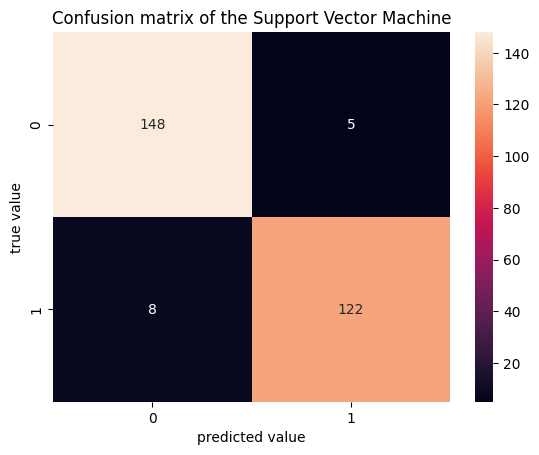

In [55]:
cm_logi = confusion_matrix(y_val, y_predict_SVC)
plt.title('Confusion matrix of the Support Vector Machine')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

# AdaBoost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = AdaBoostClassifier()
model_adaboost.fit(X_tr, y_tr)

AdaBoostClassifier()

In [57]:
#cross validation
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_adaboost = cross_val_score(estimator = model_adaboost, X = X_tr, y = y_tr, cv = kfold,scoring=scoring)
acc_adaboost.mean()

0.9984848484848484

In [58]:
# Model Evaluation
y_predict_adaboost = model_adaboost.predict(X_val)
acc= accuracy_score(y_val, y_predict_adaboost)
roc=roc_auc_score(y_val, y_predict_adaboost)
prec = precision_score(y_val, y_predict_adaboost)
rec = recall_score(y_val, y_predict_adaboost)
f1 = f1_score(y_val, y_predict_adaboost)

results = pd.DataFrame([['Adaboost',acc, acc_adaboost.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Adaboost,1.0,0.998485,1.0,1.0,1.0,1.0


In [59]:
# Confusion Matrix
print(confusion_matrix(y_val, y_predict_adaboost))
print(classification_report(y_val, y_predict_adaboost))

[[153   0]
 [  0 130]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       130

    accuracy                           1.00       283
   macro avg       1.00      1.00      1.00       283
weighted avg       1.00      1.00      1.00       283



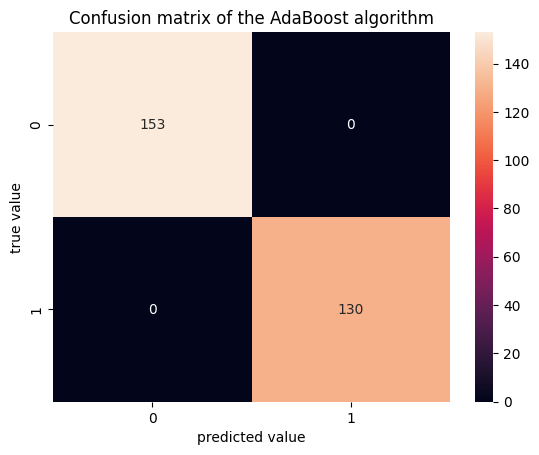

In [60]:
cm_logi = confusion_matrix(y_val, y_predict_adaboost)
plt.title('Confusion matrix of the AdaBoost algorithm')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()